# Cohort Analysis Customer Retention

In [1]:
# importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df=pd.read_csv('sales.csv')
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


### Data Preprocessing

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
# Shape of the data
df.shape

(286392, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [6]:
# Filtering only the necessary columns
df = df[['order_id', 'order_date', 'cust_id', 'Customer Since', 'qty_ordered', 'price', 'value', 'discount_amount', 'total']]
df.head(10)

,order_id,order_date,cust_id,Customer Since,qty_ordered,price,value,discount_amount,total
0,100354678,2020-10-01,60124.0,8/22/2006,21.0,89.9,1798.0,0.0,1798.0
1,100354678,2020-10-01,60124.0,8/22/2006,11.0,19.0,190.0,0.0,190.0
2,100354680,2020-10-01,60124.0,8/22/2006,9.0,149.9,1199.2,0.0,1199.2
3,100354680,2020-10-01,60124.0,8/22/2006,9.0,79.9,639.2,0.0,639.2
4,100367357,2020-11-13,60124.0,8/22/2006,2.0,99.9,99.9,0.0,99.9
5,100367357,2020-11-13,60124.0,8/22/2006,2.0,39.9,39.9,0.0,39.9
6,100367360,2020-11-13,60124.0,8/22/2006,2.0,47.6,47.6,0.0,47.6
7,100354677,2020-10-01,42485.0,2/4/1981,2.0,49.0,49.0,0.0,49.0
8,100354677,2020-10-01,42485.0,2/4/1981,2.0,135.0,135.0,0.0,135.0
9,100354677,2020-10-01,42485.0,2/4/1981,2.0,549.9,549.9,0.0,549.9


In [7]:
# it's likely that there're some errors with quantity, as quantity*price-discount is different from total (by a unit price each)
# need to check with data source, in this project let's fix it by subtract 1 from qty-ordered
df['qty_ordered'] = df['qty_ordered'] -1
df.head()

,order_id,order_date,cust_id,Customer Since,qty_ordered,price,value,discount_amount,total
0,100354678,2020-10-01,60124.0,8/22/2006,20.0,89.9,1798.0,0.0,1798.0
1,100354678,2020-10-01,60124.0,8/22/2006,10.0,19.0,190.0,0.0,190.0
2,100354680,2020-10-01,60124.0,8/22/2006,8.0,149.9,1199.2,0.0,1199.2
3,100354680,2020-10-01,60124.0,8/22/2006,8.0,79.9,639.2,0.0,639.2
4,100367357,2020-11-13,60124.0,8/22/2006,1.0,99.9,99.9,0.0,99.9


In [8]:
# filter columns again and keep just most relevant columns
df = df.drop(columns=['price', 'value', 'discount_amount'])
df.head()

,order_id,order_date,cust_id,Customer Since,qty_ordered,total
0,100354678,2020-10-01,60124.0,8/22/2006,20.0,1798.0
1,100354678,2020-10-01,60124.0,8/22/2006,10.0,190.0
2,100354680,2020-10-01,60124.0,8/22/2006,8.0,1199.2
3,100354680,2020-10-01,60124.0,8/22/2006,8.0,639.2
4,100367357,2020-11-13,60124.0,8/22/2006,1.0,99.9


In [9]:
# format data type of order_date and customer_since from object to datatime 
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%m/%d/%Y')

In [10]:
# change data type of quantity from  float to int
df['qty_ordered'] = df['qty_ordered'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        286392 non-null  object        
 1   order_date      286392 non-null  datetime64[ns]
 2   cust_id         286392 non-null  float64       
 3   Customer Since  286392 non-null  datetime64[ns]
 4   qty_ordered     286392 non-null  int64         
 5   total           286392 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 13.1+ MB


In [11]:
# check and drop duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

12420
0


In [12]:
# change columns name to be more understandable
df.columns = ['order_id', 'order_date', 'customer_id', 'customer_since', 'quantity', 'total_sales']
df.head()

,order_id,order_date,customer_id,customer_since,quantity,total_sales
0,100354678,2020-10-01,60124.0,2006-08-22,20,1798.0
1,100354678,2020-10-01,60124.0,2006-08-22,10,190.0
2,100354680,2020-10-01,60124.0,2006-08-22,8,1199.2
3,100354680,2020-10-01,60124.0,2006-08-22,8,639.2
4,100367357,2020-11-13,60124.0,2006-08-22,1,99.9


### Descriptive Statistics

In [13]:
# get statistic summary of all columns
df.describe(include='all')

,order_id,order_date,customer_id,customer_since,quantity,total_sales
count,273972.0,273972,273972.00000,273972,273972.000000,273972.000000
unique,201716.0,365,NaN,11647,NaN,NaN
top,100555234.0,2020-12-20 00:00:00,NaN,2005-11-30 00:00:00,NaN,NaN
freq,37.0,13032,NaN,2409,NaN,NaN
first,NaN,2020-10-01 00:00:00,NaN,1978-11-04 00:00:00,NaN,NaN
last,NaN,2021-09-30 00:00:00,NaN,2017-07-28 00:00:00,NaN,NaN
mean,NaN,NaN,70270.58529,NaN,1.988057,844.366027
std,NaN,NaN,30151.65465,NaN,4.559065,2017.153666
min,NaN,NaN,4.00000,NaN,0.000000,0.000000
25%,NaN,NaN,57088.00000,NaN,1.000000,50.000000


In [14]:
# unique order_id is less than count of order_id, let's group by order_id, order_date anc customer_id
da = pd.DataFrame(df.groupby(["order_date","customer_id", "order_id"]).agg({'customer_since': min, 'quantity': sum, 'total_sales': sum})).reset_index()
print("Shape of data is ", da.shape)
da.head()

Shape of data is  (201716, 6)


,order_date,customer_id,order_id,customer_since,quantity,total_sales
0,2020-10-01,16.0,100354886,1995-10-06,2,1243.7
1,2020-10-01,459.0,100354872,2014-11-10,0,0.0
2,2020-10-01,485.0,100354747,2014-09-01,12,165.0
3,2020-10-01,800.0,100354828,2002-10-08,1,185.0
4,2020-10-01,1562.0,100354794,2002-05-18,2,2790.0


### Assign Cohorts to Data

In [15]:
# add new columns - month of order and year of acquirement
da['order_month'] = da['order_date'].dt.to_period('M')
da['acquired_year'] = da['customer_since'].dt.to_period('Y')
da.head()

,order_date,customer_id,order_id,customer_since,quantity,total_sales,order_month,acquired_year
0,2020-10-01,16.0,100354886,1995-10-06,2,1243.7,2020-10,1995
1,2020-10-01,459.0,100354872,2014-11-10,0,0.0,2020-10,2014
2,2020-10-01,485.0,100354747,2014-09-01,12,165.0,2020-10,2014
3,2020-10-01,800.0,100354828,2002-10-08,1,185.0,2020-10,2002
4,2020-10-01,1562.0,100354794,2002-05-18,2,2790.0,2020-10,2002


In [16]:
# as acquired years spread too wide, let's create bins and assign acquired year to them
# change datatype of acquire_year ti int for easier calculation
da.acquired_year = da.acquired_year.astype('str')
da.acquired_year = da.acquired_year.astype('int64')

da['acquired_year_bins'] = pd.cut(x=da.acquired_year, bins= list(range(np.min(da.acquired_year), np.max(da.acquired_year) +5, 5)))
da.head(10)

,order_date,customer_id,order_id,customer_since,quantity,total_sales,order_month,acquired_year,acquired_year_bins
0,2020-10-01,16.0,100354886,1995-10-06,2,1243.7,2020-10,1995,"(1993, 1998]"
1,2020-10-01,459.0,100354872,2014-11-10,0,0.0,2020-10,2014,"(2013, 2018]"
2,2020-10-01,485.0,100354747,2014-09-01,12,165.0,2020-10,2014,"(2013, 2018]"
3,2020-10-01,800.0,100354828,2002-10-08,1,185.0,2020-10,2002,"(1998, 2003]"
4,2020-10-01,1562.0,100354794,2002-05-18,2,2790.0,2020-10,2002,"(1998, 2003]"
5,2020-10-01,1616.0,100354826,2011-11-19,1,152.5,2020-10,2011,"(2008, 2013]"
6,2020-10-01,2579.0,100354765,1987-03-10,1,242.3,2020-10,1987,"(1983, 1988]"
7,2020-10-01,2858.0,100354846,2007-02-08,4,100.0,2020-10,2007,"(2003, 2008]"
8,2020-10-01,2858.0,100354867,2007-02-08,1,150.7,2020-10,2007,"(2003, 2008]"
9,2020-10-01,3100.0,100354870,2017-03-07,3,112.8,2020-10,2017,"(2013, 2018]"


## Calculate Retention and Retention Rates

In [17]:
# count distinct customers in each bin
total_cust = pd.DataFrame(da.groupby('acquired_year_bins', as_index=False).agg({'customer_id':'nunique'}))
total_cust.columns = ['acquired_year_bins','total_cust']
total_cust

,acquired_year_bins,total_cust
0,"(1978, 1983]",648
1,"(1983, 1988]",1891
2,"(1988, 1993]",3393
3,"(1993, 1998]",5074
4,"(1998, 2003]",7261
5,"(2003, 2008]",10583
6,"(2008, 2013]",15527
7,"(2013, 2018]",19865


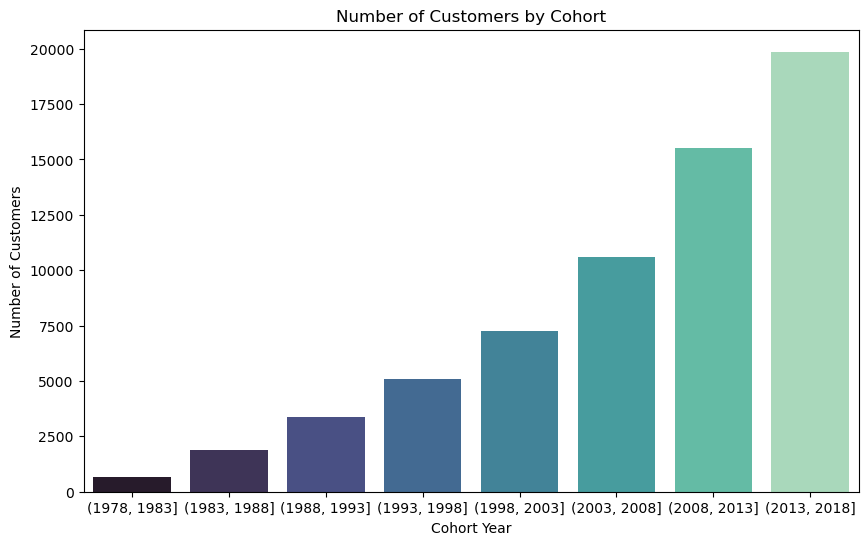

In [18]:
# create a bar plot to see the number of unique customers per cohort
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data = total_cust, x = 'acquired_year_bins', y = 'total_cust', palette = 'mako')
plt.title('Number of Customers by Cohort', fontsize = 12)
plt.xlabel('Cohort Year')
plt.ylabel('Number of Customers')

plt.show()

In [19]:
# create pivot table from dataframe and calculate the number of unique customers acquired per month per cohort 
cohort_matrix = pd.pivot_table(da,
                             index='acquired_year_bins',
                             columns= 'order_month',
                             values='customer_id',
                             aggfunc=pd.Series.nunique)

cohort_matrix

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",32,50,208,54,33,78,139,53,80,33,30,29
"(1983, 1988]",106,155,632,163,91,241,409,148,223,133,98,96
"(1988, 1993]",163,298,1139,282,192,429,739,297,402,198,183,191
"(1993, 1998]",234,412,1758,405,269,649,1139,428,552,302,280,269
"(1998, 2003]",357,624,2471,643,357,871,1649,567,782,450,344,376
"(2003, 2008]",530,844,3565,916,556,1294,2361,952,1156,647,540,577
"(2008, 2013]",772,1333,5199,1255,826,1942,3439,1338,1646,919,793,835
"(2013, 2018]",971,1635,6605,1670,1042,2509,4435,1757,2282,1188,986,1051


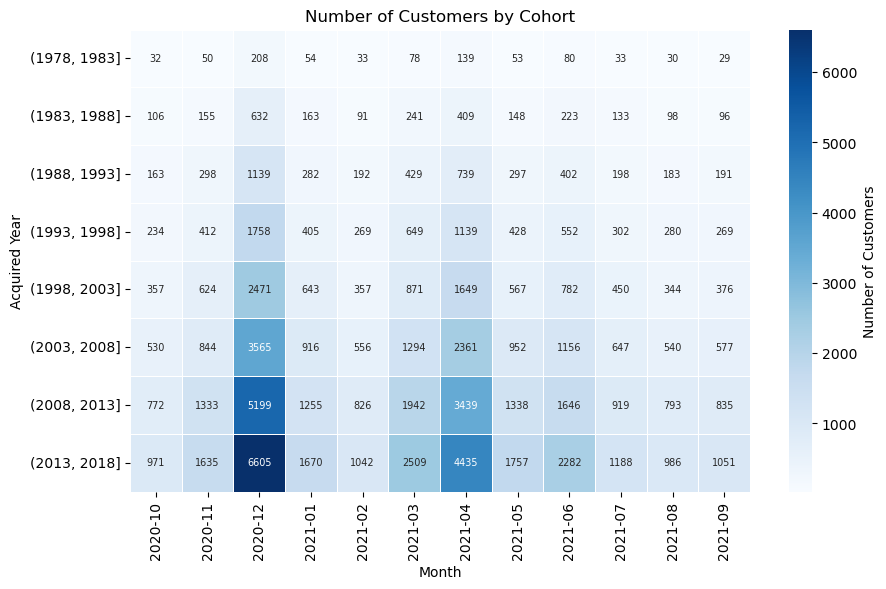

In [20]:
# create a heatmap to see the number of unique customers per cohort over time
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(cohort_matrix, annot=True, annot_kws={"size": 7}, fmt=".0f", linewidths = .4, cmap="Blues", cbar_kws={'label': 'Number of Customers'})
plt.title('Number of Customers by Cohort', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquired Year')

plt.show()

In [21]:
cohort_matrix_percentage = cohort_matrix.div(total_cust.iloc[:,1].values, axis=0)
cohort_matrix_percentage

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",0.049383,0.077160,0.320988,0.083333,0.050926,0.120370,0.214506,0.081790,0.123457,0.050926,0.046296,0.044753
"(1983, 1988]",0.056055,0.081967,0.334215,0.086198,0.048123,0.127446,0.216288,0.078265,0.117927,0.070333,0.051824,0.050767
"(1988, 1993]",0.048040,0.087828,0.335691,0.083112,0.056587,0.126437,0.217801,0.087533,0.118479,0.058355,0.053935,0.056292
"(1993, 1998]",0.046117,0.081198,0.346472,0.079819,0.053015,0.127907,0.224478,0.084352,0.108790,0.059519,0.055183,0.053015
"(1998, 2003]",0.049167,0.085939,0.340311,0.088555,0.049167,0.119956,0.227104,0.078088,0.107699,0.061975,0.047376,0.051784
"(2003, 2008]",0.050080,0.079751,0.336861,0.086554,0.052537,0.122272,0.223094,0.089956,0.109232,0.061136,0.051025,0.054521
"(2008, 2013]",0.049720,0.085850,0.334836,0.080827,0.053198,0.125072,0.221485,0.086172,0.106009,0.059187,0.051072,0.053777
"(2013, 2018]",0.048880,0.082306,0.332494,0.084067,0.052454,0.126303,0.223257,0.088447,0.114875,0.059804,0.049635,0.052907


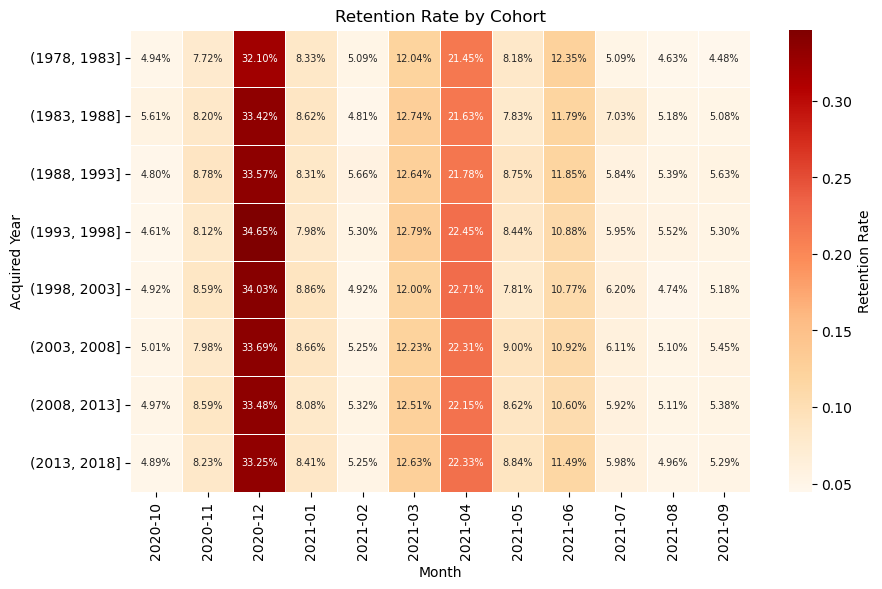

In [22]:
# create a heatmap to see retention rate of customers by cohort over time
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(cohort_matrix_percentage, annot=True, annot_kws={"size": 7}, fmt=".2%", linewidths = .4, cmap="OrRd", cbar_kws={'label': 'Retention Rate'})
plt.title('Retention Rate by Cohort', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquired Year')

plt.show()

## Cohorts by Quantity

In [23]:
# create pivot table from dataframe and calculate the average number of items per order per cohort over time
cohort_matrix_quantity = pd.pivot_table(da,
                             index='acquired_year_bins',
                             columns='order_month',
                             values='quantity',
                             aggfunc=pd.Series.mean)

cohort_matrix_quantity

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",2.556886,2.000000,1.632979,1.833333,1.761194,3.094972,3.162791,2.369048,2.543011,2.576923,2.273973,1.351852
"(1983, 1988]",1.543307,1.836676,1.749713,2.040541,5.915254,3.527508,2.575170,2.293680,2.980360,3.959064,2.500000,2.302920
"(1988, 1993]",2.116838,1.953150,1.641206,2.139262,1.655696,3.301887,2.983342,2.009957,2.505564,4.729897,1.971774,3.060526
"(1993, 1998]",1.926829,2.163701,1.724381,2.578680,2.400826,4.380884,2.989416,3.275668,2.640000,3.965517,2.457108,3.889643
"(1998, 2003]",2.319035,1.936301,1.696901,2.352273,2.399445,3.592242,2.944705,2.417747,3.444133,3.434535,1.819475,3.013171
"(2003, 2008]",1.885142,1.993987,1.660930,2.515249,2.821592,3.898655,2.940719,3.485810,3.071231,4.685327,2.919112,3.699627
"(2008, 2013]",2.018909,2.166834,1.726257,3.181428,2.961221,3.610787,3.127356,3.178459,3.546080,4.113833,2.095945,3.115826
"(2013, 2018]",2.008289,2.215351,1.865097,2.795338,4.179474,3.762740,3.028821,3.523529,3.062510,3.880881,2.819182,4.472379


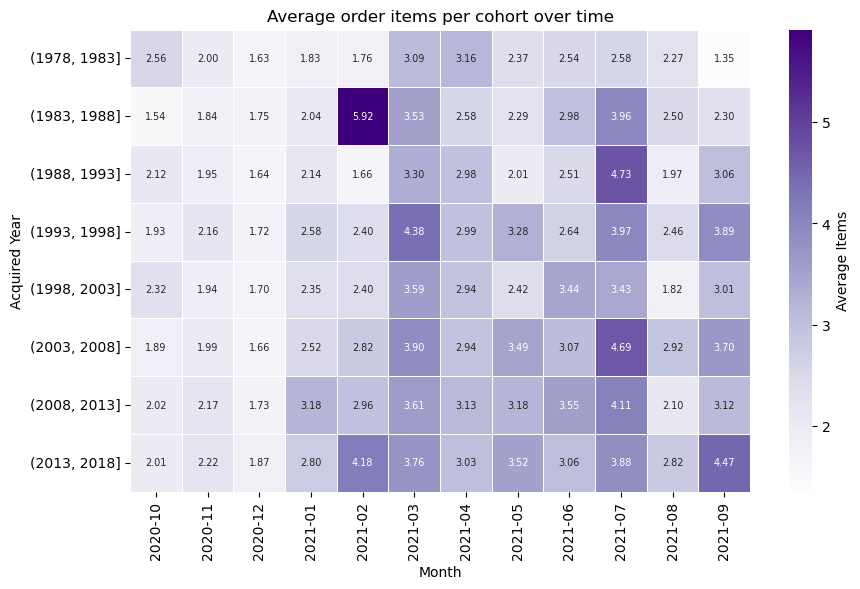

In [24]:
# create a heatmap to see the average order items per cohort over time
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(cohort_matrix_quantity, annot=True, annot_kws={"size": 7}, fmt=".2f", linewidths = .4, cmap="Purples", cbar_kws={'label': 'Average Items'})
plt.title('Average order items per cohort over time', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquired Year')

plt.show()

## Cohorts by Revenue

In [25]:
# create pivot table from dataframe and calculate the order median sales amount per cohort over time
cohort_matrix_sales= pd.pivot_table(da,
                             index='acquired_year_bins',
                             columns='order_month',
                             values='total_sales',
                             aggfunc=pd.Series.median)

cohort_matrix_sales

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",272.9,600.0,623.30525,139.90,181.0,500.000,500.00,250.00,389.877,479.9000,375.785,257.4875
"(1983, 1988]",187.0,300.0,570.01500,171.20,189.8,526.175,471.52,227.40,282.400,164.8500,277.450,355.3500
"(1988, 1993]",166.5,440.0,566.91000,239.80,199.9,746.621,500.00,250.00,299.750,550.0000,1017.400,327.8750
"(1993, 1998]",183.9,280.0,479.90000,199.80,168.0,540.950,400.00,249.50,316.750,337.8750,734.500,324.4000
"(1998, 2003]",205.4,300.0,450.00000,179.90,169.9,520.200,400.00,250.00,309.700,276.9000,370.460,337.8750
"(2003, 2008]",185.3,465.0,549.85000,200.00,169.9,500.000,449.75,195.90,295.000,250.7500,196.800,380.0000
"(2008, 2013]",155.0,300.0,462.50000,181.28,149.9,456.640,400.00,200.00,242.630,287.1875,357.000,337.8750
"(2013, 2018]",199.9,300.0,446.85000,186.80,165.4,432.000,400.00,189.95,240.000,179.9000,337.875,283.0000


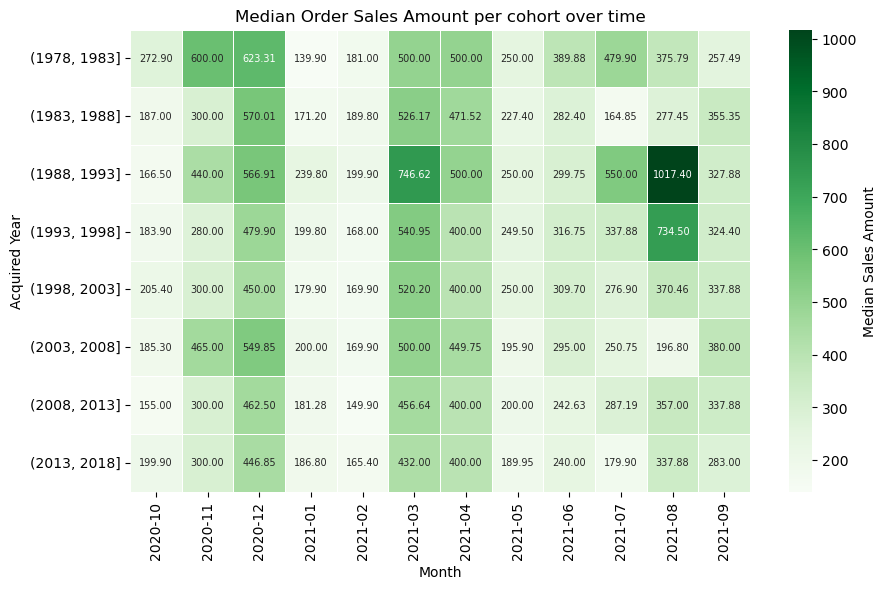

In [27]:
# Let's see if customers in certain cohorts spend more money than others
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(cohort_matrix_sales, annot=True, annot_kws={"size": 7}, fmt=".2f", linewidths = .4, cmap="Greens", cbar_kws={'label': 'Median Sales Amount'})
plt.title('Median Order Sales Amount per cohort over time', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Acquired Year')

plt.show()